# Functions and Visualizations

In the past week, you've learned a lot about using tables to work with datasets.  With your tools so far, you can:

1. Load a dataset from the web;
2. Work with (extract, add, drop, relabel) columns from the dataset;
3. Filter and sort it according to certain criteria;
4. Perform arithmetic on columns of numbers;
5. Group rows by columns of categories, counting the number of rows in each category;
6. Make a bar chart of the categories.

These tools are fairly powerful, but they're not quite enough for all the analysis and data we'll eventually be doing in this course.  Today we'll learn a tool that dramatically expands this toolbox: the table method `apply`.  We'll also see how to make histograms, which are like bar charts for numerical data.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Functions and CEO Incomes
##### In Which We Write Down a Recipe for Cake

Let's start with a real data analysis task.  We'll look at the 2015 compensation of CEOs at the 100 largest companies in California.  The data were compiled for a Los Angeles Times analysis [here](http://spreadsheets.latimes.com/california-ceo-compensation/), and ultimately came from [filings](https://www.sec.gov/answers/proxyhtf.htm) mandated by the SEC from all publicly-traded companies.  Two companies have two CEOs, so there are 102 CEOs in the dataset.

We've copied the data in raw form from the LA Times page into a file called `raw_compensation.csv`.  (The page notes that all dollar amounts are in millions of dollars.)

In [24]:
raw_compensation = Table.read_table('raw_compensation.csv')
raw_compensation

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256


**Question 1.** When we first loaded this dataset, we tried to compute the average of the CEOs' pay like this:

    np.average(raw_compensation.column("Total Pay"))

Explain why that didn't work.  *Hint:* Try looking at some of the values in the "Total Pay" column.

The entries are strings, prefixed with the $ sign, which by definition cannot be averaged out.

In [ ]:
...

**Question 2.** Extract the first value in the "Total Pay" column.  It's Mark Hurd's pay in 2015, in *millions* of dollars.  Call it `mark_hurd_pay_string`.

In [5]:
mark_hurd_pay_string = raw_compensation.column("Total Pay")[0]
mark_hurd_pay_string

'$53.25 '

In [ ]:
_ = tests.grade('q1_2')

**Question 3.** Convert `mark_hurd_pay_string` to a number of *dollars*.  The string method `strip` will be useful for removing the dollar sign; it removes a specified character from the start or end of a string.  For example, the value of `"100%".strip("%")` is the string `"100"`.  You'll also need the function `float`, which converts a string that looks like a number to an actual number.  Last, remember that the answer should be in dollars, not millions of dollars.

In [8]:
mark_hurd_pay = float(mark_hurd_pay_string.strip("$"))
mark_hurd_pay

53.25

In [ ]:
_ = tests.grade('q1_3')

To compute the average pay, we need to do this for every CEO.  But that looks like it would involve copying this code 102 times.

This is where functions come in.  First, we'll define our own function that packages together the code we wrote to convert a pay string to a pay number.  This has its own benefits.  Later in this lab we'll see a bigger payoff: we can call that function on every pay string in the dataset at once.

**Question 4.** Below we've written code that defines a function that converts pay strings to pay numbers, just like your code above.  But it has a small error, which you can correct without knowing what all the other stuff in the cell means.  Correct the problem.

In [9]:
def convert_pay_string_to_number(pay_string):
    """Converts a pay string like '$100 ' (in millions) to a number of dollars."""
    return float(pay_string.strip("$"))

In [ ]:
_ = tests.grade('q1_4')

Running that cell doesn't convert any particular pay string.

Rather, think of it as defining a *recipe* for converting a pay string to a number.  Writing down a recipe for cake doesn't give you a cake.  You have to gather the ingredients and get a chef to execute the instructions in the recipe to get a cake.  Similarly, no pay string is converted to a number until we *call* our function on a particular pay string (which tells Python, our lightning-fast chef, to execute it).

We can call our function just like we call the built-in functions we've seen.  (Almost all of those functions are defined in this way, in fact!)  It takes one argument, a string, and it returns a number.

In [ ]:
convert_pay_string_to_number(mark_hurd_pay_string)

In [ ]:
# We can also compute Safra Catz's pay in the same way:
convert_pay_string_to_number(raw_compensation.where("Name", are.equal_to("Safra A. Catz*")).column("Total Pay").item(0))

What have we gained?  Well, without the function, we'd have to copy that `10**6 * float(pay_string.strip("$"))` stuff each time we wanted to convert a pay string.  Now we just call a function whose name says exactly what it's doing.

We'd still have to call the function 102 times to convert all the salaries, which we'll fix next.

But for now, let's write some more functions.

## 2. Defining functions
##### In Which We Write a Lot of Recipes

Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.

    def to_percentage(proportion)

We put a colon after the signature to tell Python it's over.

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage.

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`.  We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor

**Question 1.** Define `to_percentage` in the cell below.  Call your function to convert the proportion .2 to a percentage.  Name that percentage `twenty_percent`.

In [10]:
def to_percentage(proportion):
    factor = 100
    return proportion * factor

twenty_percent = to_percentage(0.2)
twenty_percent

20.0

In [ ]:
_ = tests.grade('q2_1')

Like the built-in functions, you can use named values as arguments to your function.

**Question 2.** Use `to_percentage` again to convert the proportion named `a_proportion` (defined below) to a percentage called `a_percentage`.

*Note:* You don't need to define `to_percentage` again!  Just like other named things, functions stick around after you define them.

In [11]:
a_proportion = 2**(.5) / 2
a_percentage = to_percentage(a_proportion)
a_percentage

70.71067811865476

In [ ]:
_ = tests.grade('q2_2')

Here's something important about functions: Each time a function is called, it creates its own "space" for names that's separate from the main space where you normally define names.  (Exception: all the names from the main space get copied into it.)  So even though you defined `factor = 100` inside `to_percentage` above and then called `to_percentage`, you can't refer to `factor` anywhere except inside the body of `to_percentage`:

In [12]:
# You should see an error when you run this.  (If you don't, you might
# have defined factor somewhere above.)
factor

NameError: name 'factor' is not defined

As we've seen with the built-in functions, functions can also take strings (or arrays, or tables) as arguments, and they can return those things, too.

**Question 3.** Define a function called `disemvowel`.  It should take a single string as its argument.  (You can call that argument whatever you want.)  It should return a copy of that string, but with all the characters that are vowels removed.  (In English, the vowels are the characters "a", "e", "i", "o", and "u".)

*Hint:* To remove all the "a"s from a string, you can use `that_string.replace("a", "")`.  And you can call `replace` multiple times.

In [14]:
def disemvowel(a_string):
    for char in a_string:
        if char in 'aeiou':
            a_string = a_string.replace(char, "")
            
    return a_string

# An example call to your function.  (It's often helpful to run
# an example call from time to time while you're writing a function,
# to see how it currently works.)
disemvowel("Can you read this without vowels?")

'Cn y rd ths wtht vwls?'

In [ ]:
_ = tests.grade('q2_3')

##### Calls on calls on calls
Just as you write a series of lines to build up a complex computation, it's useful to define a series of small functions that build on each other.  Since you can write any code inside a function's body, you can call other functions you've written.

This is like a recipe for cake telling you to follow another recipe to make the frosting, and another to make the sprinkles.  This makes the cake recipe shorter and clearer, and it avoids having a bunch of duplicated frosting recipes.  It's a foundation of productive programming.

For example, suppose you want to count the number of characters *that aren't vowels* in a piece of text.  One way to do that is this to remove all the vowels and count the size of the remaining string.

**Question 4.** Write a function called `num_non_vowels`.  It should take a string as its argument and return a number.  The number should be the number of characters in the argument string that aren't vowels.

*Hint:* Recall that the function `len` takes a string as its argument and returns the number of characters in it.

In [15]:
def num_non_vowels(a_string):
    """The number of characters in a string, minus the vowels."""
    count = 0
    for char in a_string:
        if char in 'aeiou':
            continue
        else:
            count += 1
            
    return count
    

In [ ]:
_ = tests.grade('q2_4')

Functions can also encapsulate code that *does things* rather than just computing values.  For example, if you call `print` inside a function, and then call that function, something will get printed.

The `movies_by_year` dataset in the textbook has information about movie sales in recent years.  Suppose you'd like to display the year with the 5th-highest total gross movie sales, printed in a human-readable way.  You might do this:

In [16]:
movies_by_year = Table.read_table("movies_by_year.csv")
rank = 5
fifth_from_top_movie_year = movies_by_year.sort("Total Gross", descending=True).column("Year").item(rank-1)
print("Year number", rank, "for total gross movie sales was:", fifth_from_top_movie_year)

Year number 5 for total gross movie sales was: 2010


After writing this, you realize you also wanted to print out the 2nd and 3rd-highest years.  Instead of copying your code, you decide to put it in a function.  Since the rank varies, you make that an argument to your function.

**Question 5.** Write a function called `print_kth_top_movie_year`.  It should take a single argument, the rank of the year (like 2, 3, or 5 in the above examples).  It should print out a message like the one above.  It shouldn't have a `return` statement.

In [17]:
def print_kth_top_movie_year(k):
    # Our solution used 2 lines.
    movie = movies_by_year.sort("Total Gross", descending=True).column("Year").item(k-1)
    print("Year number", k, "for total gross movie sales was:", movie)

# Example calls to your function:
print_kth_top_movie_year(2)
print_kth_top_movie_year(3)

Year number 2 for total gross movie sales was: 2013
Year number 3 for total gross movie sales was: 2012


In [ ]:
_ = tests.grade('q2_5')

## 3. `apply`ing functions
##### In Which Python Bakes 102 Cakes
You'll get more practice writing functions, but let's move on.  

Defining a function is a lot like giving a name to a value with `=`.  In fact, a function is a value just like the number 1 or the text "the"!

For example, we can make a new name for the built-in function `max` if we want:

In [ ]:
our_name_for_max = max
our_name_for_max(2, 6)

The old name for `max` is still around:

In [ ]:
max(2, 6)

Try just writing `max` or `our_name_for_max` (or the name of any other function) in a cell, and run that cell.  Python will print out a (very brief) description of the function.

In [18]:
max

<function max>

Why is this useful?  Since functions are just values, it's possible to pass them as arguments to other functions.  Here's a simple but not-so-practical example: we can make an array of functions.

In [ ]:
make_array(max, np.average, are.equal_to)

**Question 1.** Make an array containing any 3 other functions you've seen.  Call it `some_functions`.

In [ ]:
some_functions = make_array(abs, np.mean, min)
some_functions

In [ ]:
_ = tests.grade('q3_1')

Working with functions as values can lead to some funny-looking code.  For example, see if you can figure out why this works:

In [ ]:
make_array(max, np.average, are.equal_to).item(0)(4, -2, 7)

Here's a simpler example that's actually useful: the table method `apply`.

`apply` calls a function many times, once on *each* element in a column of a table.  It produces an array of the results.  Here we use `apply` to convert every CEO's pay to a number, using the function you defined:

In [30]:
pay = raw_compensation.apply(convert_pay_string_to_number, "Total Pay")


Here's an illustration of what that did:

<img src="apply.png"/>

Note that we didn't write something like `convert_pay_string_to_number()` or `convert_pay_string_to_number("Total Pay")`.  The job of `apply` is to call the function we give it, so instead of calling `convert_pay_string_to_number` ourselves, we just write its name as an argument to `apply`.

**Question 2.** Using `apply`, make a table that's a copy of `raw_compensation` with one more column called "Total Pay (\$)".  It should be the result of applying `convert_pay_string_to_number` to the "Total Pay" column, as we did above.  Call the new table `compensation`.

In [40]:
compensation = raw_compensation.with_column(
    "Total Pay ($)",
    pay)
compensation.set_format("Total Pay ($)", NumberFormatter).show()

Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($)
1,Mark V. Hurd*,Oracle (Redwood City),$53.25,(No previous year),$0.95,$52.27,$0.02,362,53.25
2,Safra A. Catz*,Oracle (Redwood City),$53.24,(No previous year),$0.95,$52.27,$0.02,362,53.24
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3%,$24.89,$17.28,$2.74,477,44.91
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15%,$1.00,$34.43,$0.55,342,35.98
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16%,$4.65,$27.26,$1.45,338,33.36
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4%,$12.10,$12.37,$0.37,222,24.84
7,John S. Watson,Chevron (San Ramon),$22.04,-15%,$4.31,$14.68,$3.05,183,22.04
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27%,$2.47,$17.26,$0.13,182,19.86
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19%,$5.10,$14.51,$0.01,170,19.62
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10%,$6.80,$12.50,$0.02,256,19.32


In [ ]:
_ = tests.grade('q3_2')

Now that we have the pay in numbers, we can compute things about them.

**Question 3.** Compute the average total pay of the CEOs in the dataset.

In [51]:
average_total_pay = compensation.column("Total Pay ($)").mean()
average_total_pay

11.445294117647055

In [ ]:
_ = tests.grade('q3_3')

**Question 4.** Companies pay executives in a variety of ways: directly in cash; by granting stock or other "equity" in the company; or with ancillary benefits (like private jets).  Compute the proportion of each CEO's pay that was cash.  (Your answer should be an array of numbers, one for each CEO in the dataset.)

In [39]:
cash_proportion = compensation.apply(convert_pay_string_to_number, "Cash Pay") / compensation.column("Total Pay ($)")
cash_proportion

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


array([ 0.01784038,  0.01784373,  0.55421955,  0.02779322,  0.13938849,
        0.48711755,  0.19555354,  0.12437059,  0.25993884,  0.35196687,
        0.3075693 ,  0.22138635,  0.13126362,  0.1708126 ,  0.23099415,
        0.06734817,  0.13043478,  0.28004957,  0.33229814,  0.15355805,
        0.29337748,  0.21829105,  0.31100478,  0.25086147,  0.2299169 ,
        0.16991643,  0.31795947,  0.26188786,  0.28357143,  0.15654718,
        0.38168558,  0.28934426,  0.20361248,  0.47650453,  0.45643154,
        0.36402027,  0.2177626 ,  0.24763543,  0.42562724,  0.2610261 ,
        0.18361836,  0.1444548 ,  0.33333333,  0.10834132,  0.20925747,
        0.97276265,  0.22979552,  0.22789784,  0.37893701,  0.25175527,
        0.73895582,  0.37018256,  0.2412731 ,  0.2133758 ,  0.20553781,
        0.23318872,  0.33664459,  0.3875969 ,  0.56094808,  0.11757991,
        0.35239207,  0.24463007,  0.25      ,  0.23712575,  0.43377886,
        0.31424936,  0.46363636,  0.32585752,  0.24766977,  0.98

In [ ]:
_ = tests.grade('q3_4')

Check out the "% Change" column in `compensation`.  It shows the percentage increase in the CEO's pay from the previous year.  For CEOs with no previous year on record, it instead says "(No previous year)".  The values in this column are *strings*, not numbers, so like the "Total Pay" column, it's not usable without a bit of extra work.

Given your current pay and the percentage increase from the previous year, you can compute your previous year's pay.  For example, if your pay is \$100 this year, and that's an increase of 50% from the previous year, then your previous year's pay was $\frac{\$100}{1 + \frac{50}{100}}$, or around \$66.66.

**Question 5.** Create a new table called `with_previous_compensation`.  It should be a copy of `compensation`, but with the "(No previous year)" CEOs filtered out, and with an extra column called "2014 Total Pay ($)".  That column should have each CEO's pay in 2014.

*Hint:* This question takes several steps, but each one is still something you've seen before.  Take it one step at a time, using as many lines as you need.  You can print out your results after each step to make sure you're on the right track.

*Hint 2:* You'll need to define a function.  You can do that just above your other code.

In [49]:
# For reference, our solution involved more than just this one line of code
def convert_percent_to_num(percent):
    return int(percent.strip("%"))

with_previous_compensation = compensation.where("% Change", are.not_equal_to("(No previous year)"))
with_previous_compensation = with_previous_compensation.with_columns("% Change", 
                                 with_previous_compensation.apply(convert_percent_to_num, "% Change"))
with_previous_compensation = with_previous_compensation.with_columns("Change Factor", 
                                (with_previous_compensation.column("% Change") + 100)/100)

with_previous_compensation = with_previous_compensation.with_columns("2014 Total Pay ($)",
                                                                    with_previous_compensation.column("Total Pay ($)") / 
                                                                    with_previous_compensation.column("Change Factor"))

with_previous_compensation.show()


Rank,Name,Company (Headquarters),Total Pay,% Change,Cash Pay,Equity Pay,Other Pay,Ratio of CEO pay to average industry worker pay,Total Pay ($),Change Factor,2014 Total Pay ($)
3,Robert A. Iger,Walt Disney (Burbank),$44.91,-3,$24.89,$17.28,$2.74,477,44.91,0.97,46.299
4,Marissa A. Mayer,Yahoo! (Sunnyvale),$35.98,-15,$1.00,$34.43,$0.55,342,35.98,0.85,42.3294
5,Marc Benioff,salesforce.com (San Francisco),$33.36,-16,$4.65,$27.26,$1.45,338,33.36,0.84,39.7143
6,John H. Hammergren,McKesson (San Francisco),$24.84,-4,$12.10,$12.37,$0.37,222,24.84,0.96,25.875
7,John S. Watson,Chevron (San Ramon),$22.04,-15,$4.31,$14.68,$3.05,183,22.04,0.85,25.9294
8,Jeffrey Weiner,LinkedIn (Mountain View),$19.86,27,$2.47,$17.26,$0.13,182,19.86,1.27,15.6378
9,John T. Chambers**,Cisco Systems (San Jose),$19.62,19,$5.10,$14.51,$0.01,170,19.62,1.19,16.4874
10,John G. Stumpf,Wells Fargo (San Francisco),$19.32,-10,$6.80,$12.50,$0.02,256,19.32,0.9,21.4667
11,John C. Martin**,Gilead Sciences (Foster City),$18.76,-1,$5.77,$12.98,$0.01,117,18.76,0.99,18.9495
13,Shantanu Narayen,Adobe Systems (San Jose),$18.36,3,$2.41,$15.85,$0.09,125,18.36,1.03,17.8252


In [ ]:
_ = tests.grade('q3_5')

**Question 6.** What was the average pay of these CEOs in 2014?  Does it make sense to compare this number to the number you computed in question 3?

In [50]:
average_pay_2014 = with_previous_compensation.column("2014 Total Pay ($)").mean()
average_pay_2014

11.649176115603435

In [ ]:
_ = tests.grade('q3_6')

**Question 7.** A skeptical student asks:

> "I already knew lots of ways to operate on each element of an array at once.  For example, I can multiply each element of `some_array` by 100 by writing `100*some_array`.  What good is `apply`?

How would you answer?  Discuss with a neighbor.

## 4. Histograms
Earlier, we computed the average pay among the CEOs in our 102-CEO dataset.  The average doesn't tell us everything about the amounts CEOs are paid, though.  Maybe just a few CEOs make the bulk of the money, even among these 102.

We can use a *histogram* to display more information about a set of numbers.  The table method `hist` takes a single argument, the name of a column of numbers.  It produces a histogram of the numbers in that column.

**Question 1.** Make a histogram of the pay of the CEOs in `compensation`.

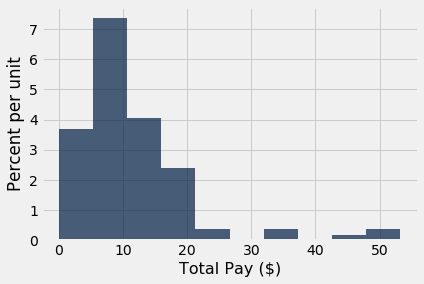

In [52]:
compensation.hist("Total Pay ($)")

**Question 2.** Looking at the histogram, how many CEOs made more than \$30 million?  (Answer the question by filling in your answer manually.  You'll have to do a bit of arithmetic; feel free to use Python as a calculator.)

In [53]:
num_ceos_more_than_30_million = compensation.bin()

**Question 3.** Answer the same question with code.  *Hint:* Use the table method `where` and the property `num_rows`.

In [55]:
num_ceos_more_than_30_million_2 = compensation.where("Total Pay ($)", are.above(30))
num_ceos_more_than_30_million_2.num_rows

5

In [ ]:
_ = tests.grade('q4_3')

**Question 4.** Do most CEOs make around the same amount, or are there some who make a lot more than the rest?  Discuss with someone near you.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [tests.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [ ]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".lab04_$(date +%m%d_%H%M)_submission.html" lab04.ipynb